In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


/kaggle/input/fetchrewards/data_daily.csv


# Read the Data

In [3]:
data = pd.read_csv('data_daily.csv')
data.head()

,# Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   # Date         365 non-null    object
 1   Receipt_Count  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [5]:
# As the date column is in object column convert it to datetime column and also will rename it to Date for convinience
data.rename(columns={'# Date': 'Date'}, inplace=True)
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Receipt_Count  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


# Check for null values

In [7]:
data.isnull().sum()

Date             0
Receipt_Count    0
dtype: int64

# Check the Distribution of Target Column

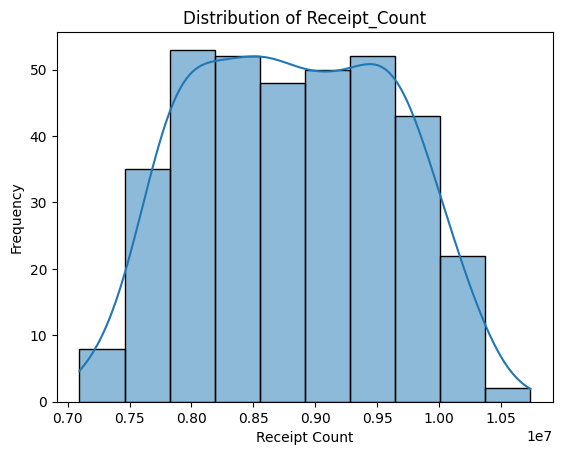

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Receipt_Count'],fill=True, kde = True)
plt.xlabel('Receipt Count')
plt.ylabel('Frequency')
plt.title('Distribution of Receipt_Count')

# Show the plot
plt.show()


From the graph above, the distribution appears to be roughly bell-shaped, which is characteristic of a normal distribution.

# Convert the data into monthly time frame

In [9]:
data['month'] = data['Date'].dt.to_period('M')
data_monthly = data.groupby('month')['Receipt_Count'].sum().reset_index()

# Monthly Analysis

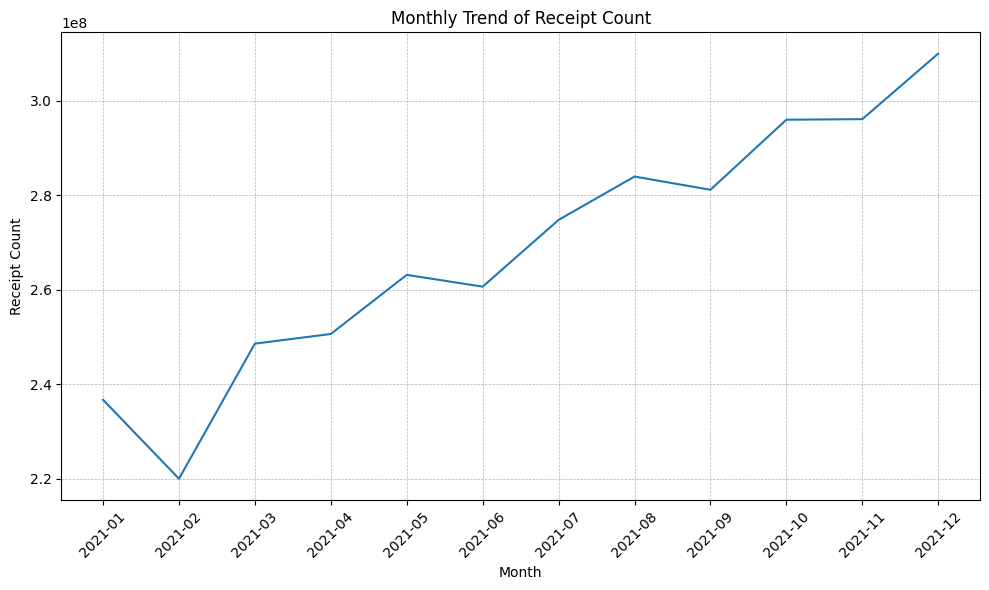

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(data_monthly['month'].astype(str), data_monthly['Receipt_Count'])
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Receipt Count')
plt.title('Monthly Trend of Receipt Count')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Observations:

Overall, there seems to be an upward trend in the receipt count throughout the year. This indicates that the total count of receipts has been increasing over time.

There's a noticeable dip in February which is significant. This could be due to various reasons such as seasonal effects, operational challenges, fewer days in February, or external factors affecting the business. It would be essential to investigate this further to understand the cause.After the dip in February, there's a consistent increase in the count of receipts. The months of March, April, and May show a steady recovery.

From June to September, the trend seems relatively stable with slight increments. There aren't any drastic changes observed.From October onwards, there's again a noticeable increase in the trend, suggesting a strong close to the year.

# Indepth Monthly analysis

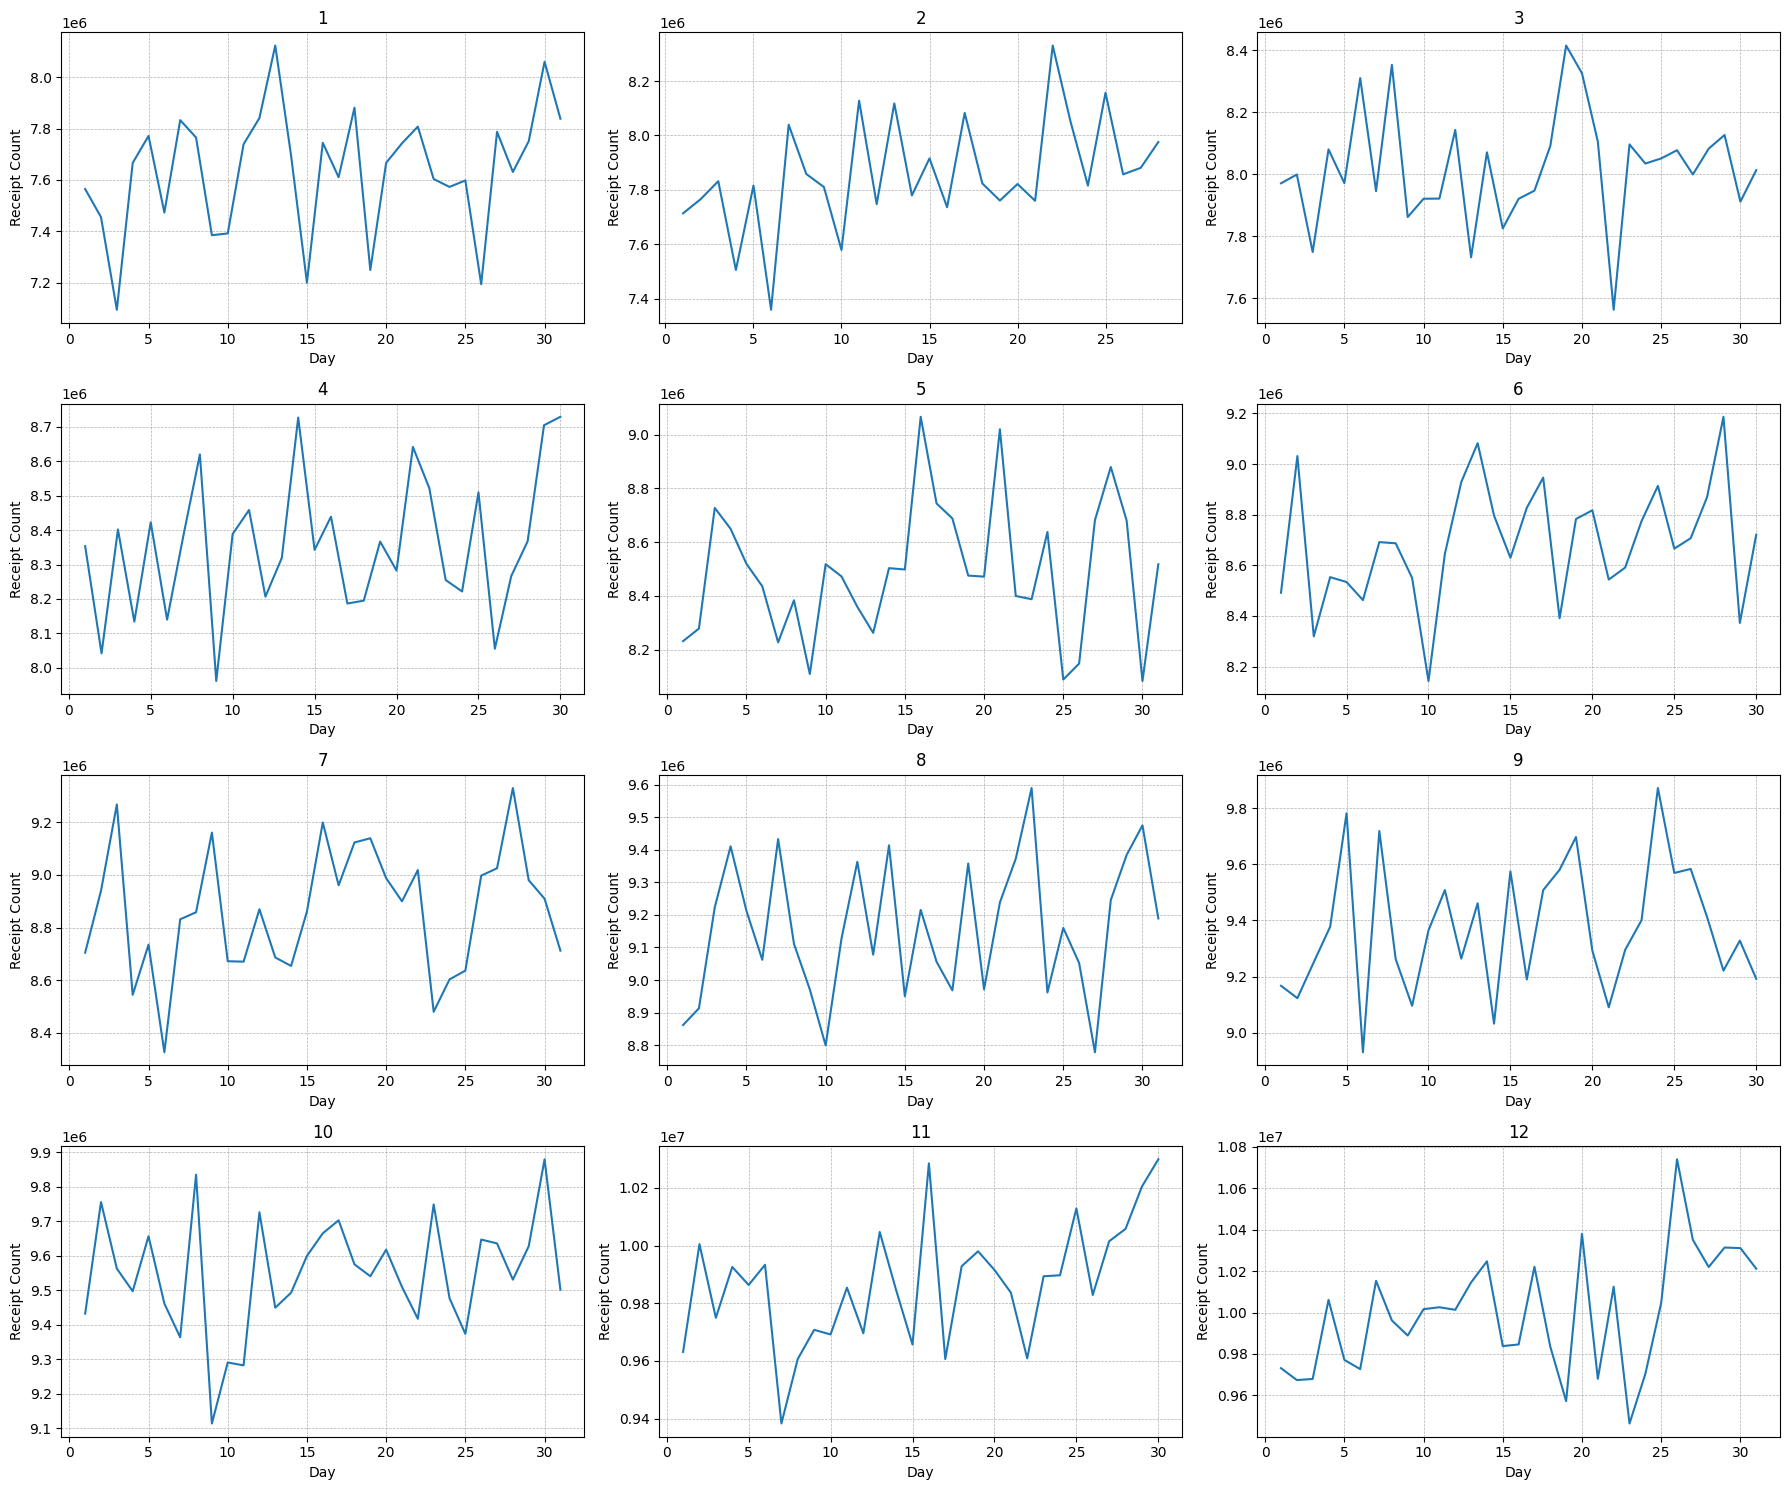

In [11]:
data['day'] = data['Date'].dt.day
plt.figure(figsize=(18, 15))
data['month'] = data['Date'].dt.month
months = data['month'].unique()

for i, month in enumerate(months, start=1):
    monthly_data = data[data['month'] == month]
    plt.subplot(4, 3, i)  # Assuming 4 rows and 3 columns for 12 months
    plt.plot(monthly_data['day'], monthly_data['Receipt_Count'])
    # Labeling and titling
    plt.title(str(month))
    plt.xlabel('Day')
    plt.ylabel('Receipt Count')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Observations:


1. General Observation: There's a clear daily fluctuation in the receipt count throughout the months, suggesting a potentially regular pattern or cycle in the data. This could be related to specific days of the week having higher or lower transactions, or it could be influenced by external factors like promotions, holidays, or business cycles.

2. Month 1, 2, & 3: These months have a somewhat consistent pattern, with some days showing a peak and others showing a dip. The receipt count seems to be oscillating between ~7.6M and ~8.0M.

3. Month 4 & 5: The patterns here show a few more pronounced peaks and valleys compared to the first three months. It might be worth investigating if there were any special events or promotions during these times that could account for these spikes.

4. Month 6: This month has a slightly rising trend toward the end.

5. Month 7: There's a noticeable dip around the 10th to 15th day of the month. It would be interesting to see if this corresponds to a weekend or some other significant event.

6. Month 8 & 9: The patterns are a bit more volatile here, especially in month 9 with a sharp rise and fall in the middle.

7. Month 10: This month has a more stable pattern, oscillating between ~9.1M and ~9.8M without any sudden spikes or drops.

8. Month 11: Starts off low and then there's a steady increase, reaching a peak near the end. This could potentially be related to shopping patterns, perhaps in anticipation of holiday sales or events.

9. Month 12: This month shows the highest values, especially towards the end. Given that it's December, it's likely influenced by holiday shopping, end-of-year sales, or other year-end activities.

# Model Building

I am Gonna Experiment with multiple models in this notebook and will chose one with better performance. I am chosing mean absolute percent error as my metric because it gives an easy to interperate percentage showing how off the predictions are.

For this task I am going with Facebook Prophet Model, Linear Regression, XGboost and GRU models and compare which one is doing better and will deploy it in out web app. 

# FaceBook Prophet Model

For this model I am using expanded window (also known as rolling-window or sliding-window) validation technique to Validate my model. So what we do is we train on 1st month and predict on next consecutive months, and again we train on 1st and 2nd month and predict on next consecutive months and so on...

We are training on [1] months and predicting on consecutive months.


20:22:29 - cmdstanpy - INFO - Chain [1] start processing
20:22:29 - cmdstanpy - INFO - Chain [1] done processing
20:22:30 - cmdstanpy - INFO - Chain [1] start processing
20:22:30 - cmdstanpy - INFO - Chain [1] done processing


We are training on [1 2] months and predicting on consecutive months.


20:22:30 - cmdstanpy - INFO - Chain [1] start processing
20:22:30 - cmdstanpy - INFO - Chain [1] done processing


We are training on [1 2 3] months and predicting on consecutive months.


20:22:31 - cmdstanpy - INFO - Chain [1] start processing
20:22:31 - cmdstanpy - INFO - Chain [1] done processing


We are training on [1 2 3 4] months and predicting on consecutive months.


20:22:31 - cmdstanpy - INFO - Chain [1] start processing
20:22:31 - cmdstanpy - INFO - Chain [1] done processing


We are training on [1 2 3 4 5] months and predicting on consecutive months.


20:22:31 - cmdstanpy - INFO - Chain [1] start processing
20:22:31 - cmdstanpy - INFO - Chain [1] done processing


We are training on [1 2 3 4 5 6] months and predicting on consecutive months.


20:22:32 - cmdstanpy - INFO - Chain [1] start processing
20:22:32 - cmdstanpy - INFO - Chain [1] done processing


We are training on [1 2 3 4 5 6 7] months and predicting on consecutive months.


20:22:32 - cmdstanpy - INFO - Chain [1] start processing
20:22:32 - cmdstanpy - INFO - Chain [1] done processing


We are training on [1 2 3 4 5 6 7 8] months and predicting on consecutive months.


20:22:32 - cmdstanpy - INFO - Chain [1] start processing
20:22:32 - cmdstanpy - INFO - Chain [1] done processing


We are training on [1 2 3 4 5 6 7 8 9] months and predicting on consecutive months.


20:22:33 - cmdstanpy - INFO - Chain [1] start processing
20:22:33 - cmdstanpy - INFO - Chain [1] done processing


We are training on [ 1  2  3  4  5  6  7  8  9 10] months and predicting on consecutive months.


20:22:33 - cmdstanpy - INFO - Chain [1] start processing
20:22:33 - cmdstanpy - INFO - Chain [1] done processing


We are training on [ 1  2  3  4  5  6  7  8  9 10 11] months and predicting on consecutive months.


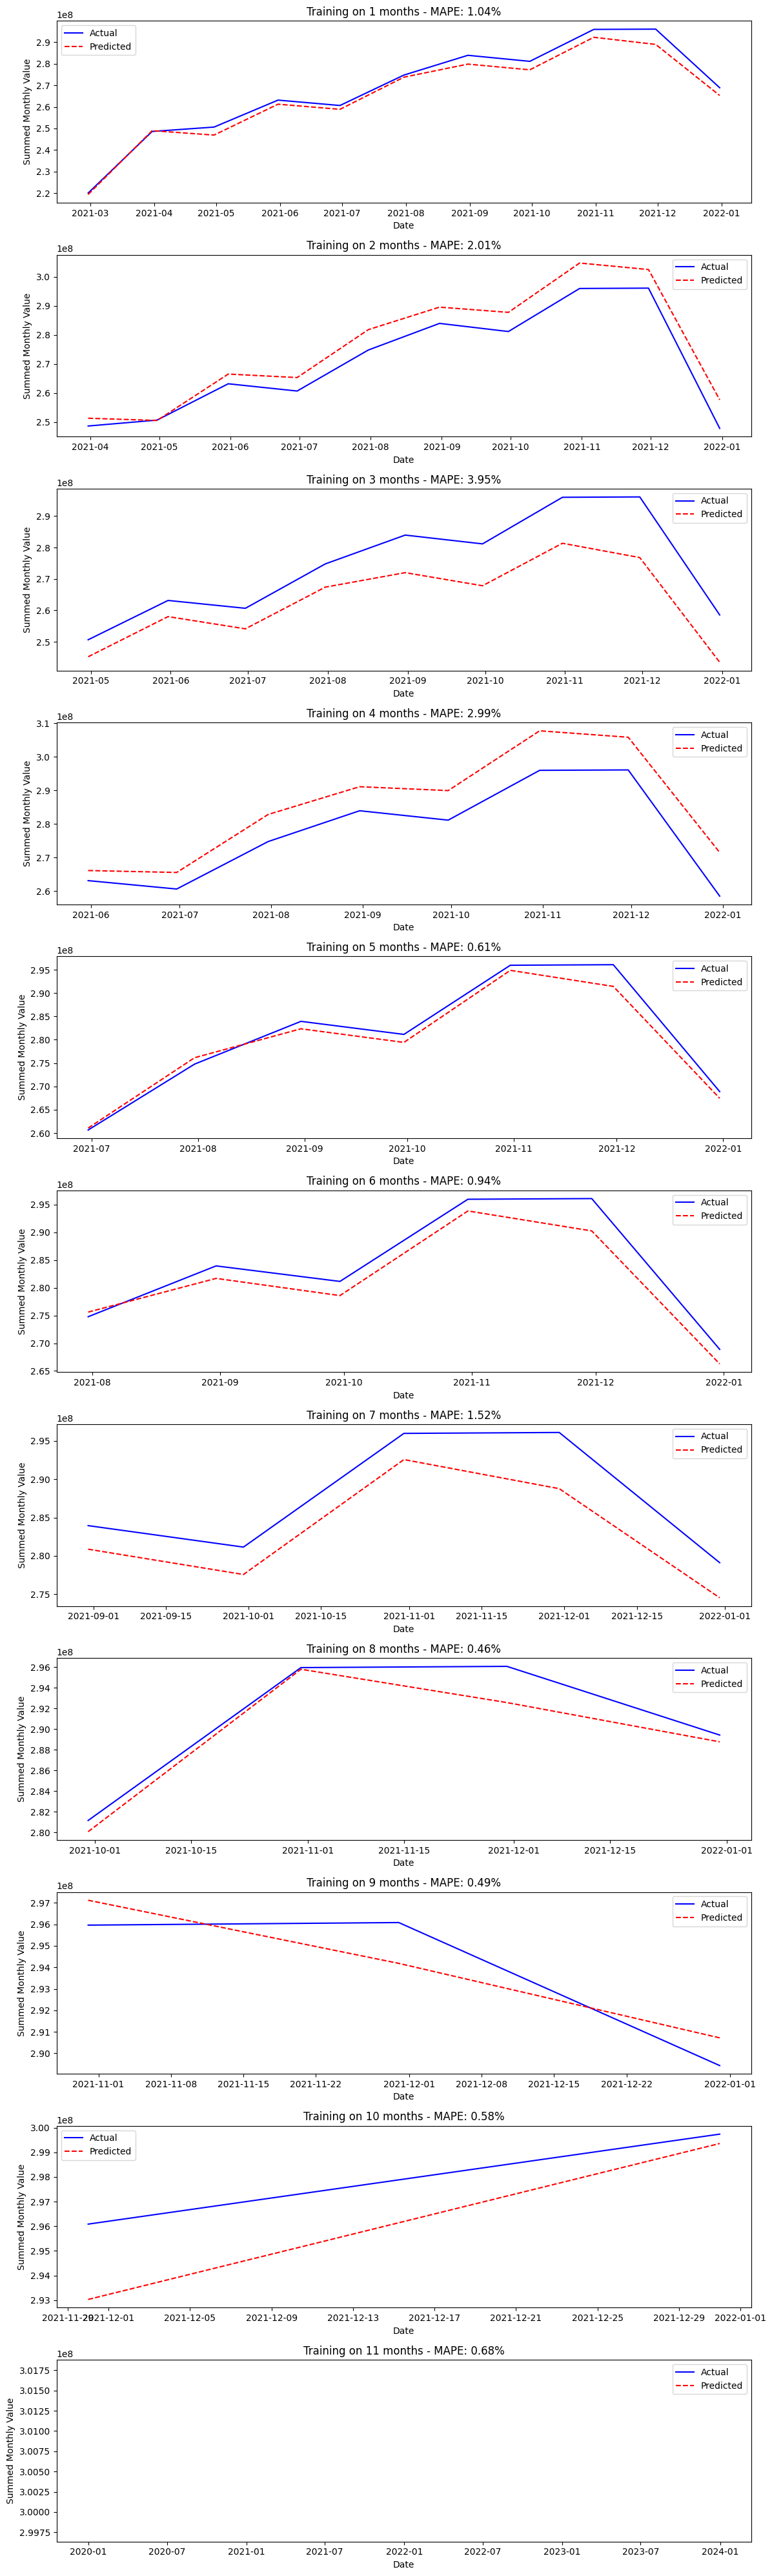

In [13]:
# Importing necessary libraries
from prophet import Prophet
import calendar

# prophet requires Date to be ds and target variable to be y
df_prophet = data.rename(columns={'Date': 'ds', 'Receipt_Count': 'y'})

# Create a figure for subplots
fig, axs = plt.subplots(11, 1, figsize=(12, 40))

train_end = 0  # Initialize to track the end of training data

for month in range(1, 12):  # We will do this 11 times 
    
    year = df_prophet.iloc[train_end]['ds'].year  # Get the current year
    month_days = calendar.monthrange(year, month)[1]  # Get the number of days in the month
    
    train = df_prophet.iloc[:train_end + month_days]  # Get data from the start up to the current month
    test = df_prophet.iloc[train_end + month_days:train_end + month_days + (12 - month) * 30]
    
    months = train['ds'].dt.month.unique()
    
    print(f'We are training on {months} months and predicting on consecutive months.')
    
    model = Prophet()
    model.fit(train)
    
    future = model.make_future_dataframe(periods=len(test))
    forecast = model.predict(future)
    
    forecast.set_index('ds', inplace=True)
    monthly_predictions = forecast['yhat'].iloc[-len(test):].resample('M').sum()
    test.set_index('ds', inplace=True)
    monthly_actuals = test['y'].resample('M').sum()
    
    mape = (abs(monthly_actuals - monthly_predictions) / monthly_actuals).mean() * 100

    # Plotting
    axs[month-1].plot(monthly_actuals.index, monthly_actuals.values, label='Actual', color='blue')
    axs[month-1].plot(monthly_predictions.index, monthly_predictions.values, label='Predicted', color='red', linestyle='--')
    axs[month-1].legend()
    axs[month-1].set_title(f"Training on {month} months - MAPE: {mape:.2f}%")
    axs[month-1].set_xlabel("Date")
    axs[month-1].set_ylabel("Summed Monthly Value")
    
    train_end += month_days  # Update train_end for the next iteration

plt.tight_layout()
plt.show()


### We can observe from the above plots that the prophet model is able to capture the trend. But it seems to be overfitting with the training data. Also we got very low MAPE whice is very good! 

### Prophet Inference

20:22:45 - cmdstanpy - INFO - Chain [1] start processing
20:22:45 - cmdstanpy - INFO - Chain [1] done processing


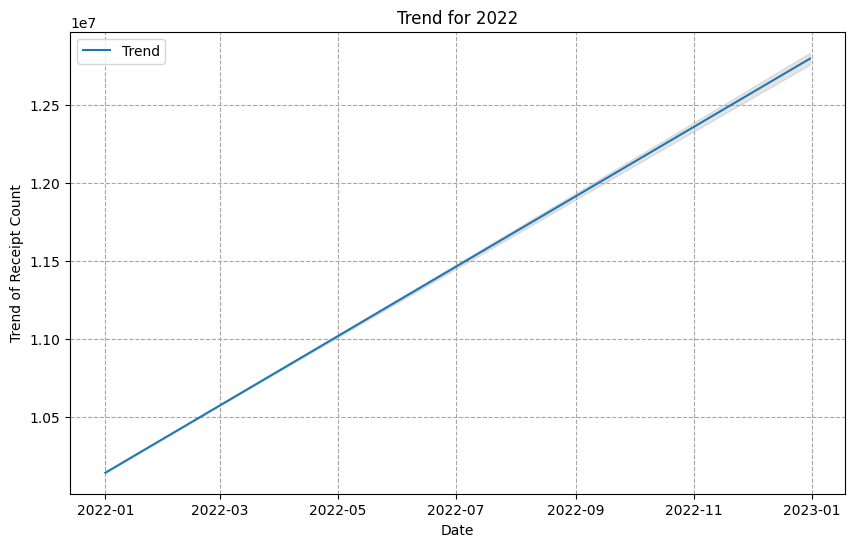

In [14]:
model = Prophet()
model.fit(df_prophet)

# Create a future dataframe for 2022
future_dates = model.make_future_dataframe(periods=365, freq='D')  # 365 days for 2022
forecast_2022 = model.predict(future_dates)

# Filter forecast for only 2022 data
forecast_2022 = forecast_2022[forecast_2022['ds'].dt.year == 2022]

# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast_2022['ds'], forecast_2022['trend'], label='Trend')
plt.fill_between(forecast_2022['ds'], forecast_2022['trend_lower'], forecast_2022['trend_upper'], color='grey', alpha=0.2)
plt.title("Trend for 2022")
plt.xlabel("Date")
plt.ylabel("Trend of Receipt Count")
plt.legend()
plt.grid(True, which="both", ls="--", c='0.65')
plt.show()


### As we discussed earlier the model captured the trend and it started mimicing it on other years as well. Just a linearly progressing line from start of the year to end of the year. 

# Linear Regression

### I want to try out the linear regression model for this task. For this I am also doing some feature engineering like extarcting key features from the date column like year, month, day, week of the year, day of week, is weekend(0 or 1), quarter (which quarter of the year), is the date month starting or ending. I also want to add features like is it holiday are not. But I dont know the orgin of the data so I skipped that part. 

In [15]:
# utils function to extarct date time features

def get_time_feature(df, col, keep=True):
    df_copy = df.copy()
    prefix = col + "_"
    df_copy[col] = pd.to_datetime(df_copy[col])
    df_copy[prefix + 'year'] = df_copy[col].dt.year
    df_copy[prefix + 'month'] = df_copy[col].dt.month
    df_copy[prefix + 'day'] = df_copy[col].dt.day
    df_copy[prefix + 'weekofyear'] = df_copy[col].dt.isocalendar().week.astype(int)
    df_copy[prefix + 'dayofweek'] = df_copy[col].dt.dayofweek.astype(int)
    df_copy[prefix + 'is_wknd'] = df_copy[col].dt.dayofweek // 4
    df_copy[prefix + 'quarter'] = df_copy[col].dt.quarter
    df_copy[prefix + 'is_month_start'] = df_copy[col].dt.is_month_start.astype(int)
    df_copy[prefix + 'is_month_end'] = df_copy[col].dt.is_month_end.astype(int)
    if keep: return df_copy
    else: return df_copy.drop([col], axis=1)
    
data_new = get_time_feature(data[["Date","Receipt_Count"]],"Date")

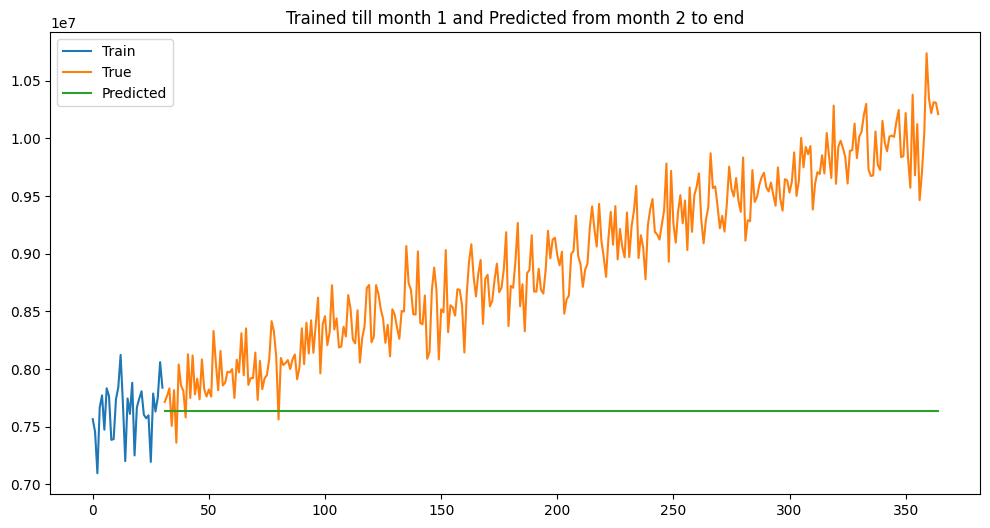

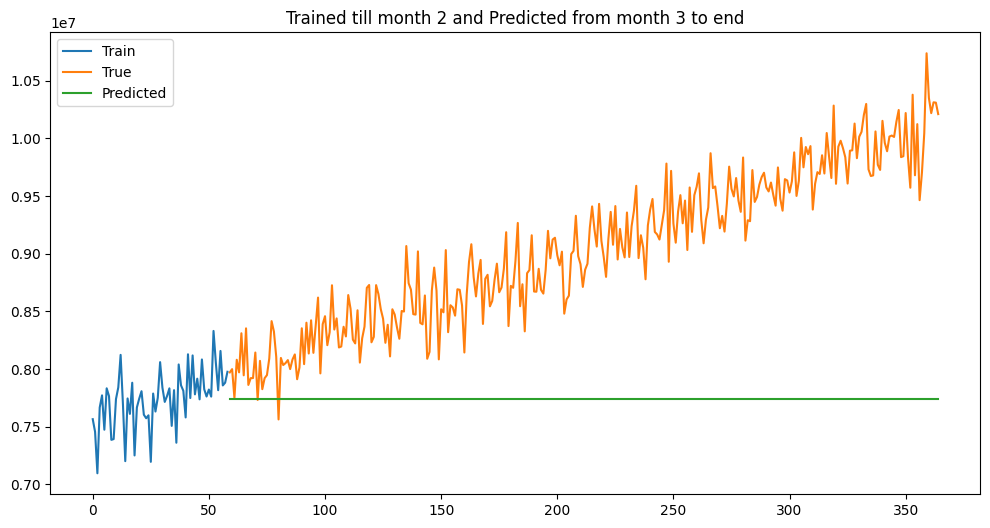

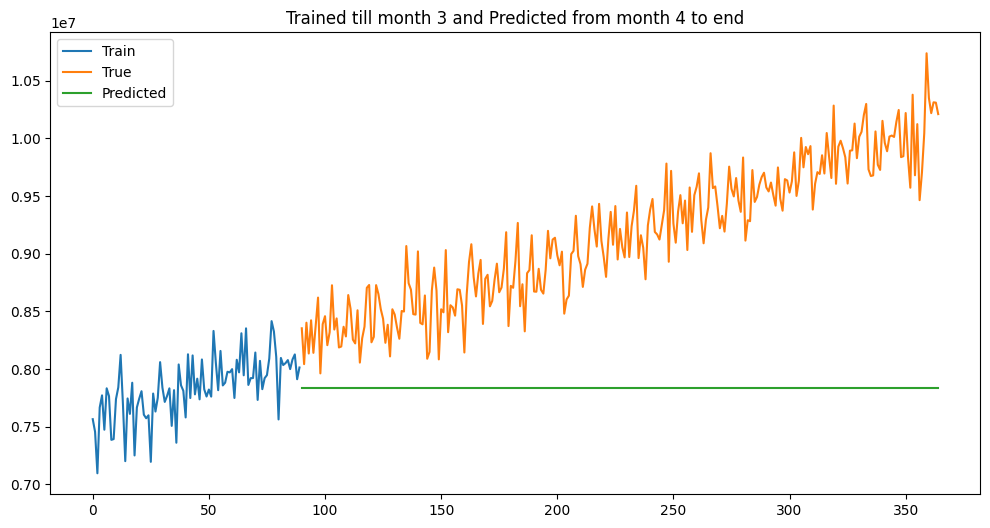

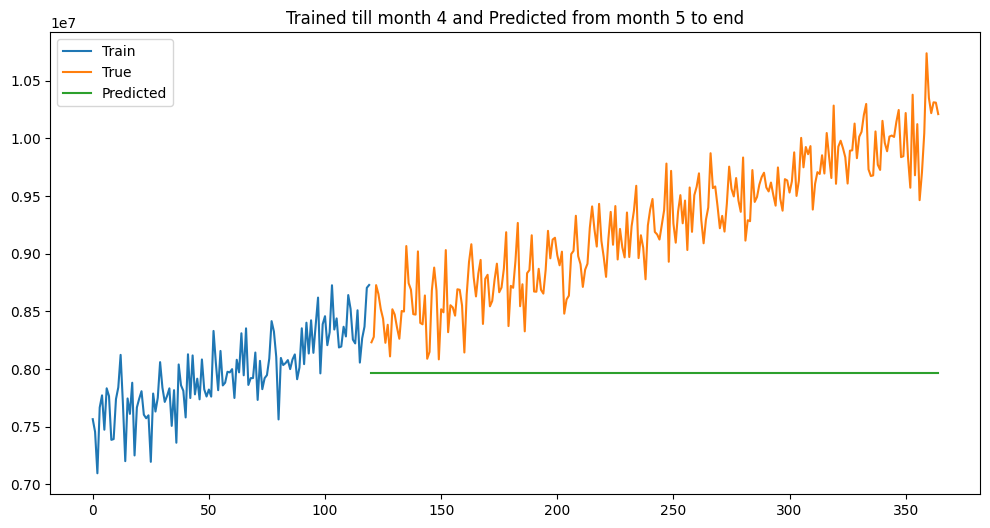

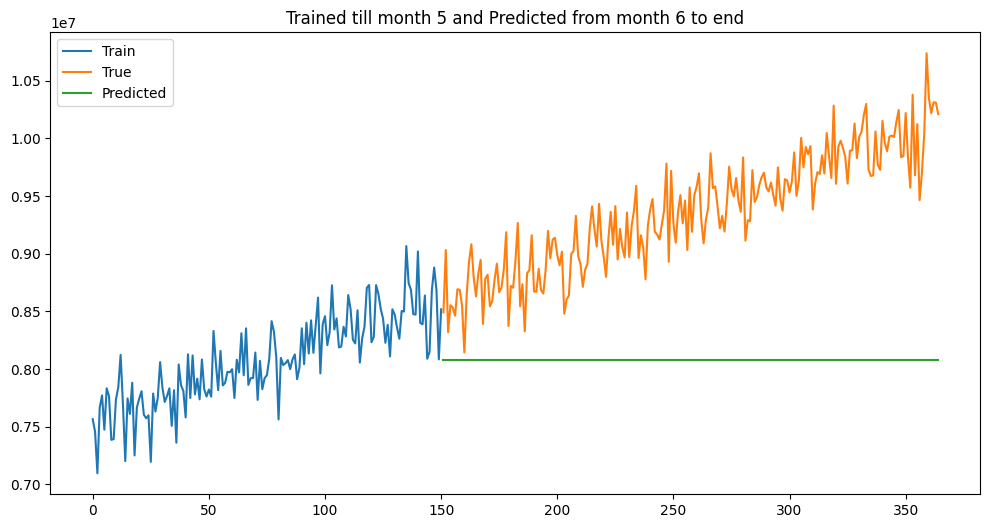

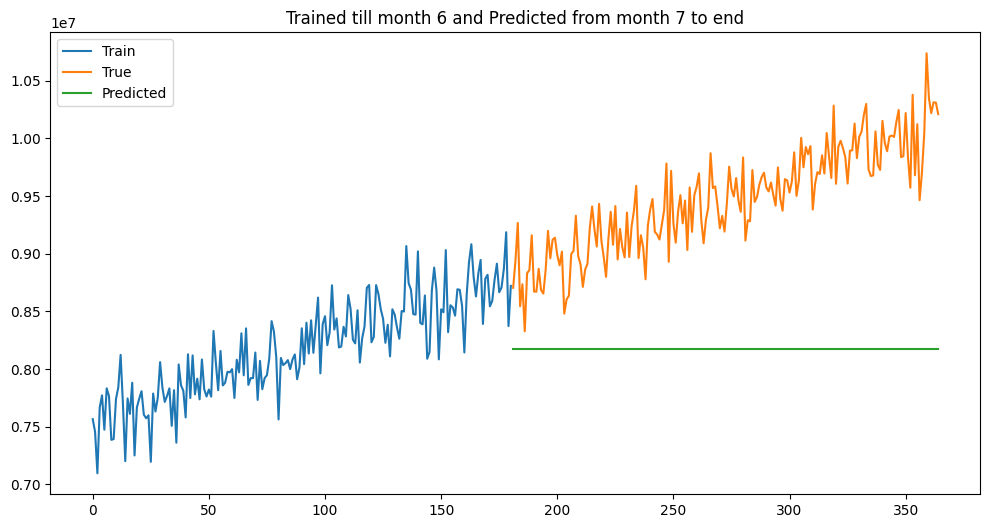

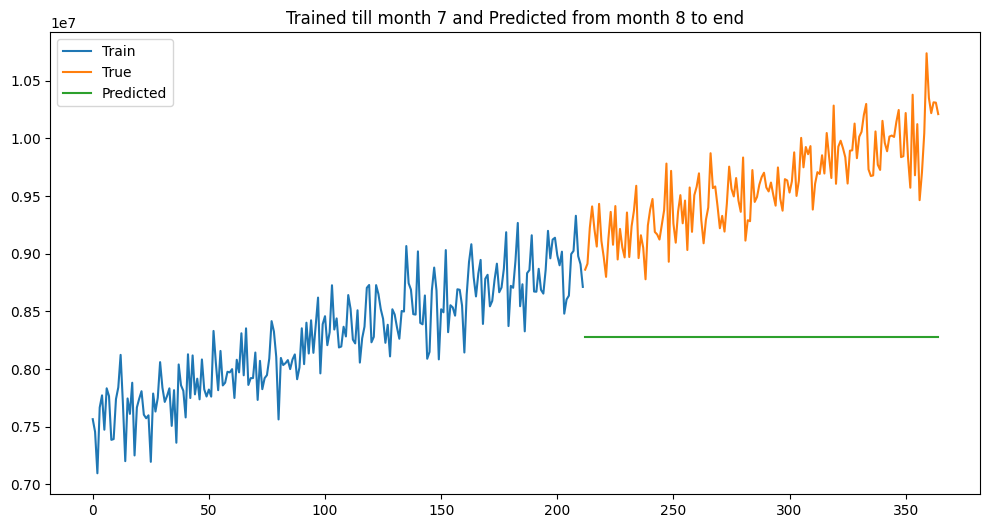

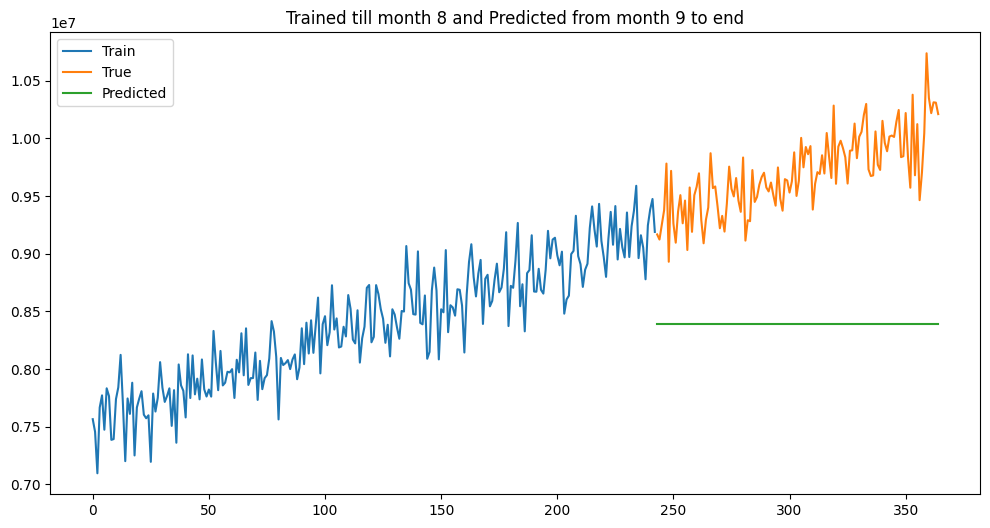

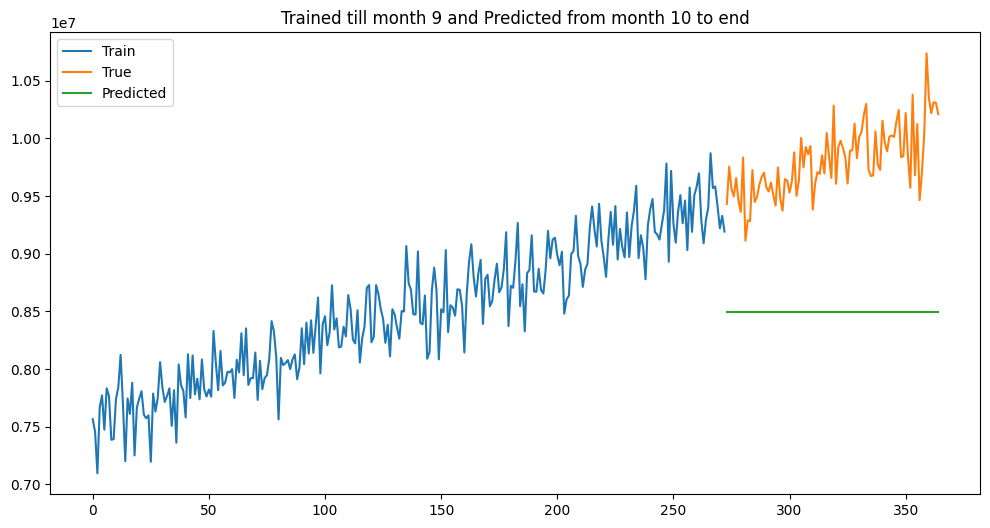

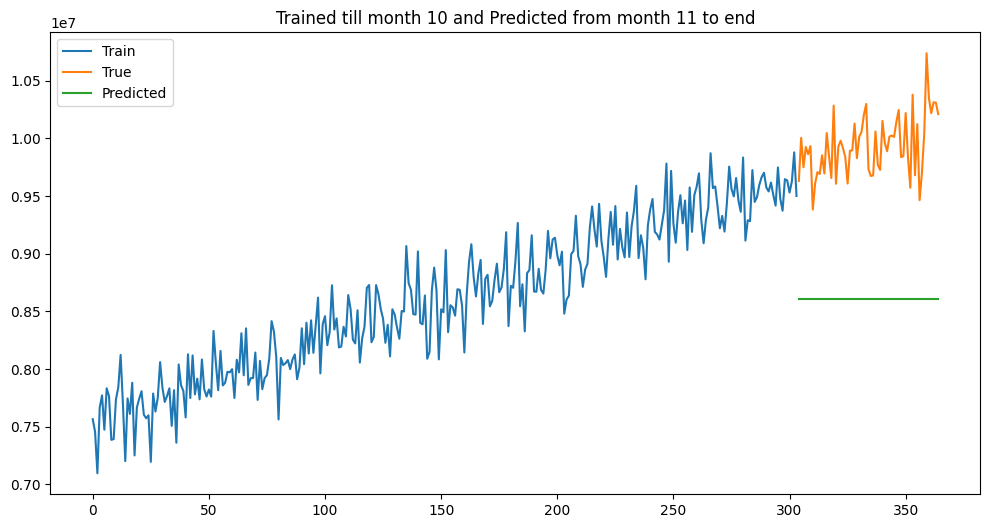

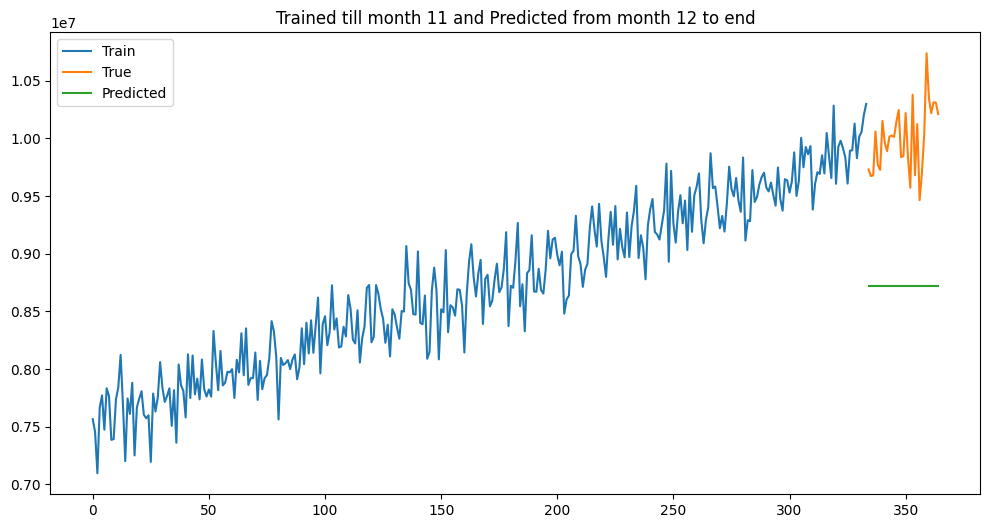

Average MAPE over all folds: 13.51%


In [16]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def simple_linear_regression(X, Y):
    n = len(X)
    
    # Calculate the mean of X and Y
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    
    # Calculate XY and X²
    sum_XY = np.sum((X - mean_X) * (Y - mean_Y))
    sum_X2 = np.sum((X - mean_X) ** 2)
    
    # Check for division by zero
    if sum_X2 == 0:
        print("Warning: Division by zero encountered. Check if all X values are same.")
        return 0, mean_Y  # Returning zero slope and Y intercept as mean of Y
    
    # Calculate slope and intercept
    m = sum_XY / sum_X2
    c = mean_Y - m * mean_X
    
    return m, c

def predict(m, c, X):
    return m * X + c

def expanding_window_validation(df, target_col):
    errors = []
    
    for end_month in range(1, 12):  # For each month
        # Split data
        train_end_idx = df[df['Date_month'] == end_month].index[-1]
        X_train, y_train = df.iloc[:train_end_idx+1].drop([target_col,'Date'], axis=1), df.iloc[:train_end_idx+1][target_col]
        X_test, y_test = df.iloc[train_end_idx+1:].drop([target_col,'Date'], axis=1), df.iloc[train_end_idx+1:][target_col]
        
        slope, intercept = simple_linear_regression(X_train.values[:, 0], y_train.values)
        predictions = predict(slope, intercept, X_test.values[:, 0])
        
        error = mape(y_test.values, predictions)
        errors.append(error)
        
        # Plot
        plt.figure(figsize=(12, 6))
        plt.plot(y_train.index, y_train, label='Train')
        plt.plot(y_test.index, y_test, label='True')
        plt.plot(y_test.index, predictions, label='Predicted')
        plt.title(f'Trained till month {end_month} and Predicted from month {end_month+1} to end')
        plt.legend()
        plt.show()
            
    return errors


# Assuming `data_new` is your dataframe
errors = expanding_window_validation(data_new, 'Receipt_Count')
print(f"Average MAPE over all folds: {np.mean(errors):.2f}%")


### We can see from the above plots the the model is not doing good in the validation part. Its just predicting the same values over and over again. Also the MAPE is quite high which is 13.51%. 

# Xgboost

The next model I am gonna try is Xgboost. 

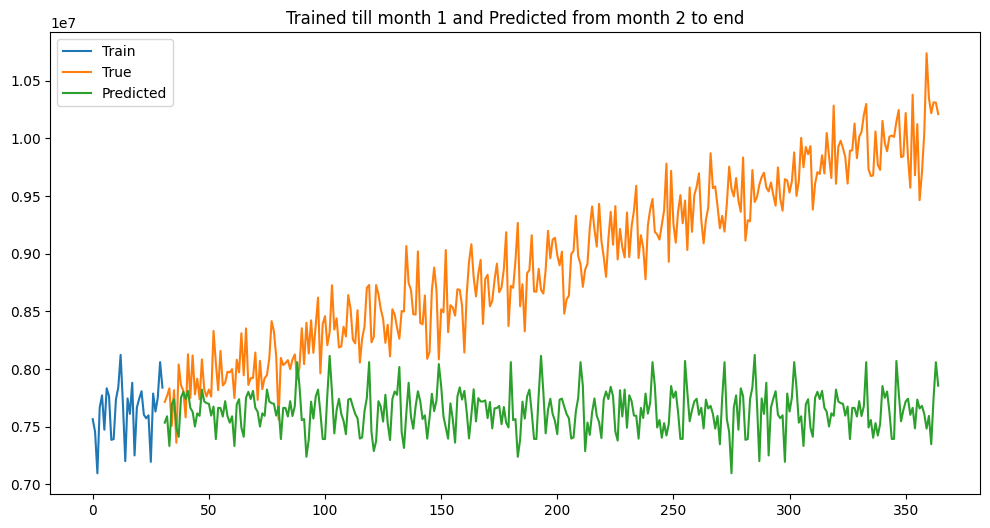

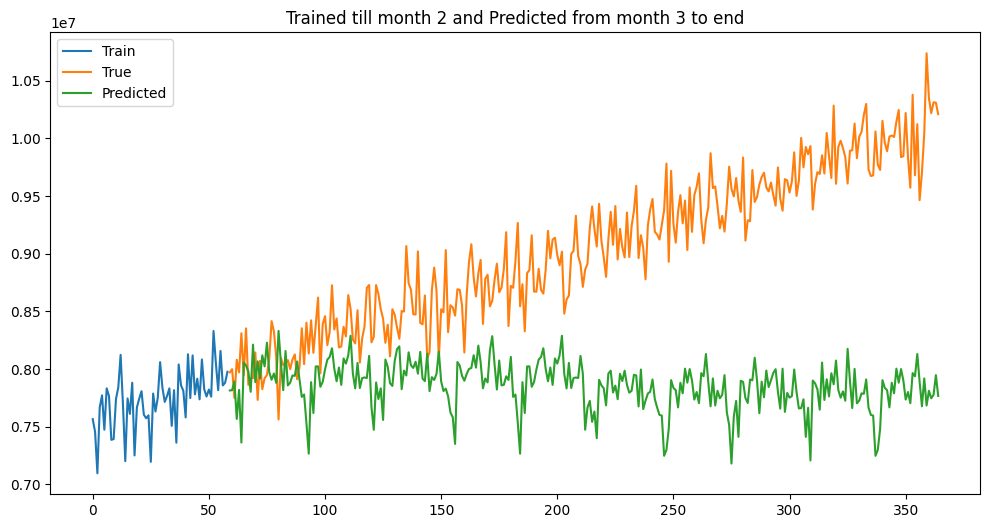

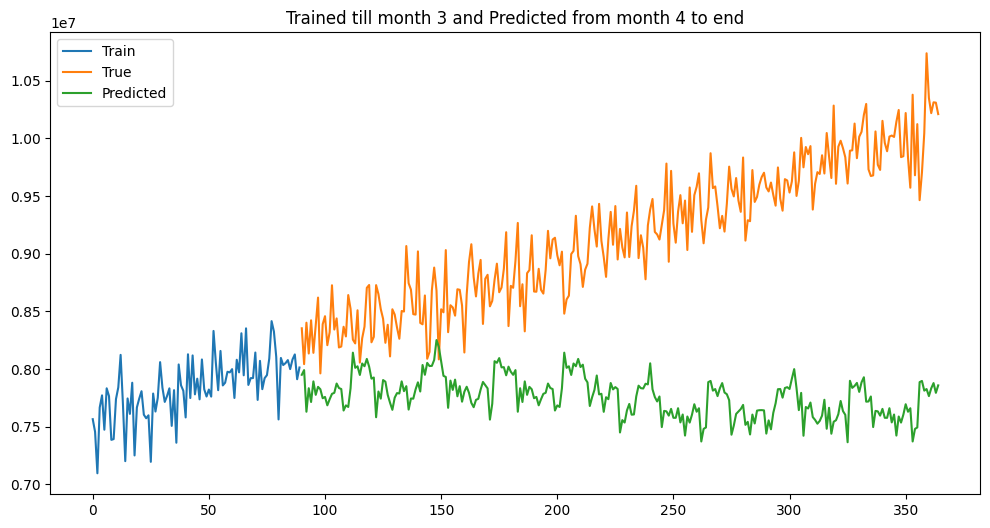

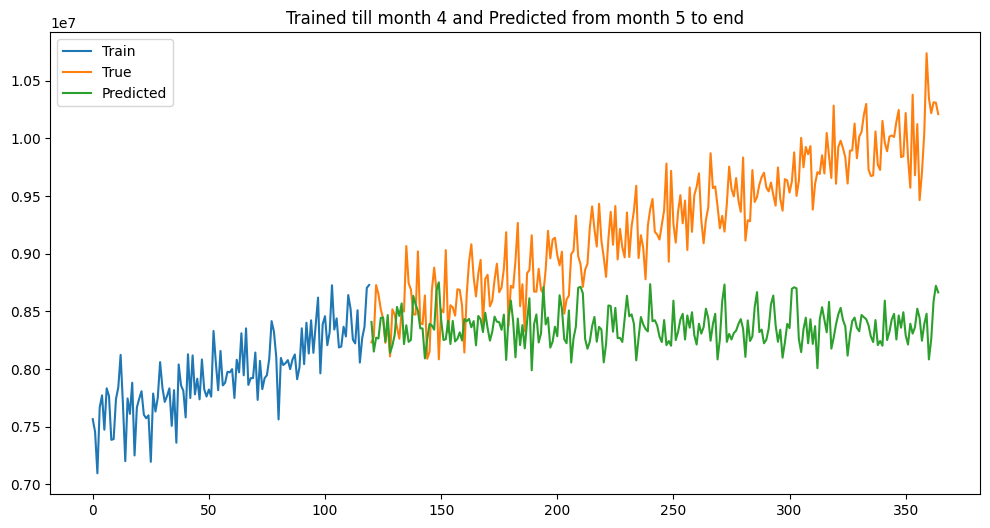

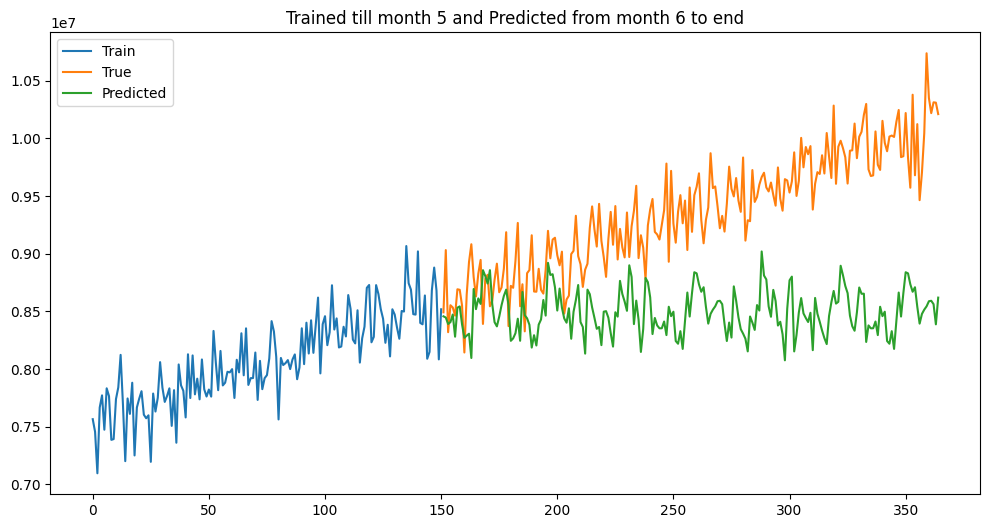

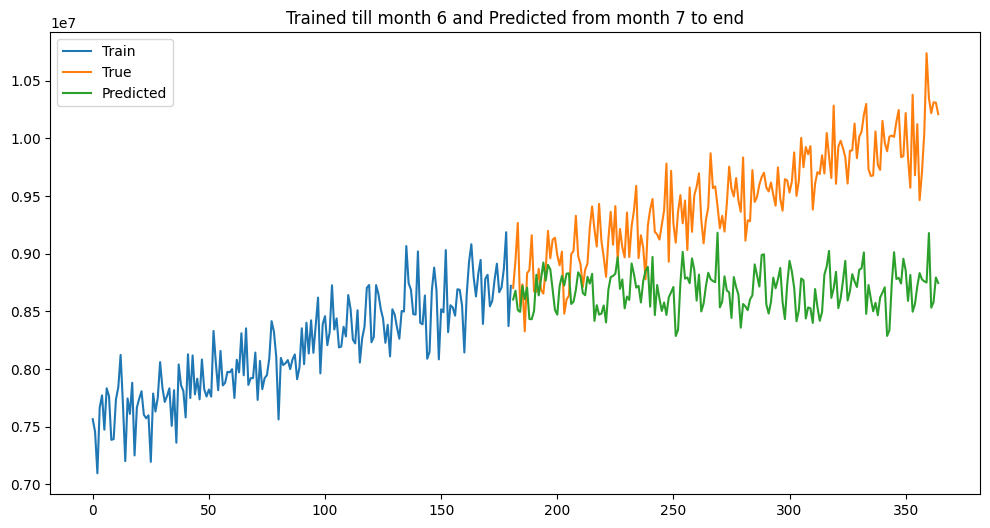

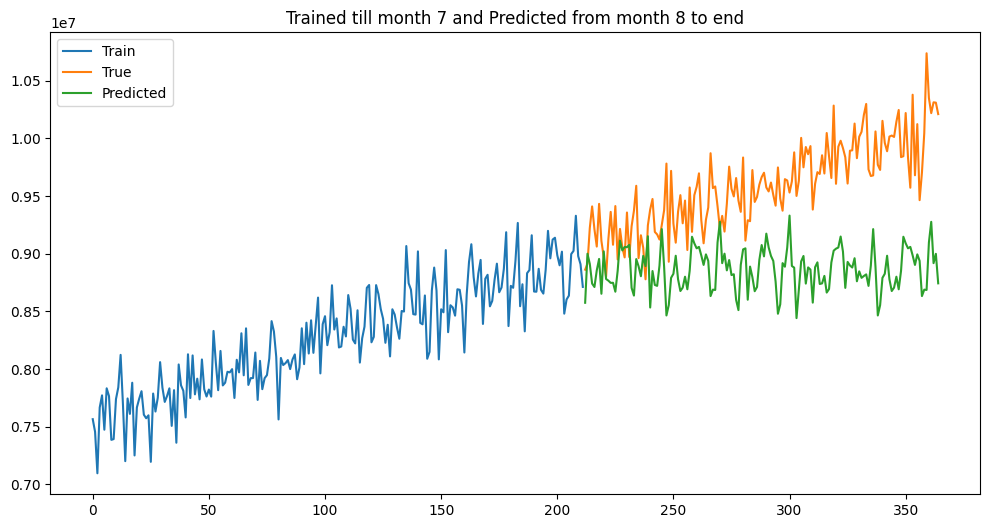

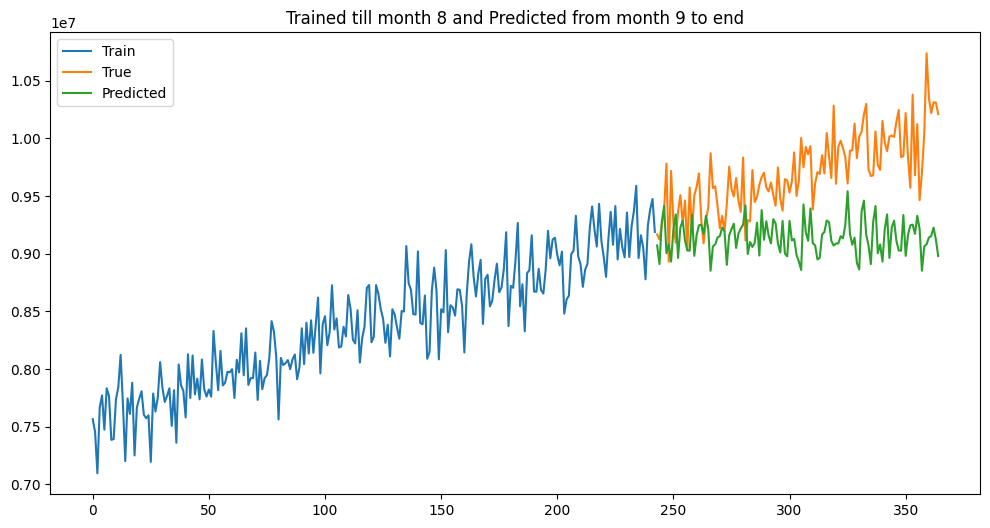

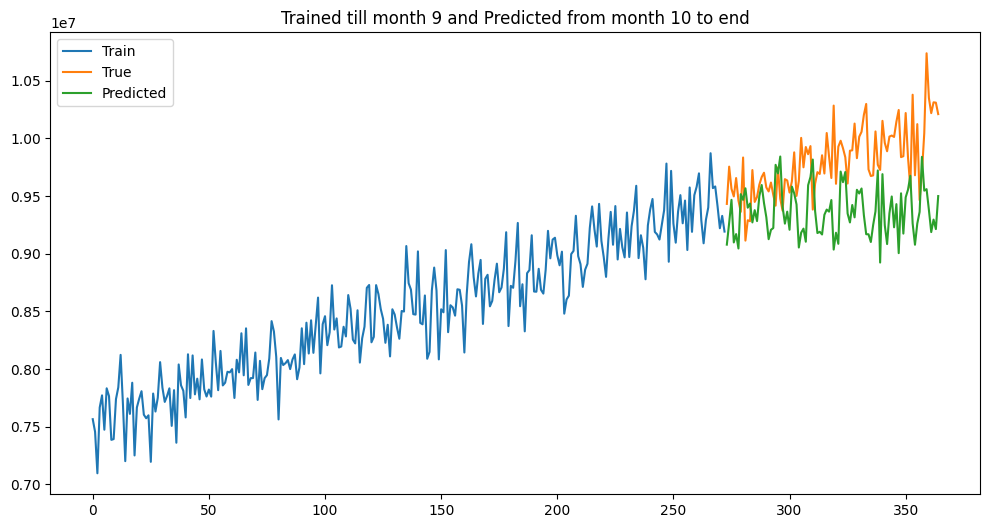

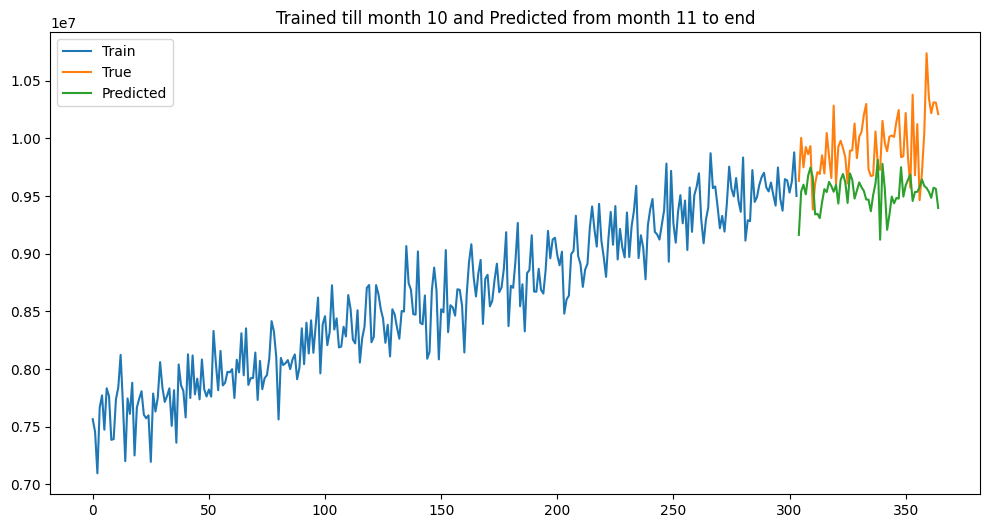

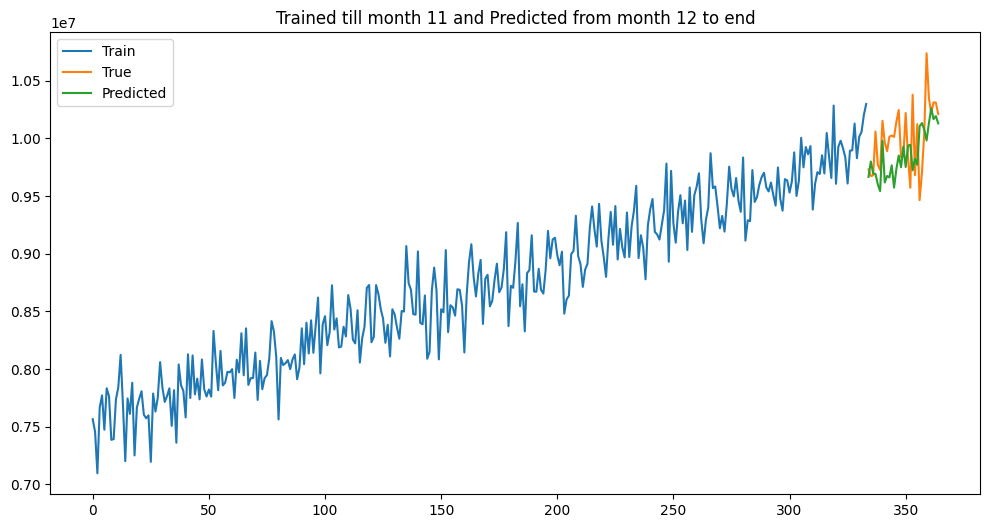

Average MAPE over all folds: 8.48%


In [17]:
import xgboost as xgb

def expanding_window_validation(df, target_col):
    df = df.drop(['Date'],axis = 1)
    errors = []
    for end_month in range(1, 12):  # For each month
        # Split data
        train_end_idx = df[df['Date_month'] == end_month].index[-1]
        X_train, y_train = df.iloc[:train_end_idx+1].drop(target_col, axis=1), df.iloc[:train_end_idx+1][target_col]
        X_test, y_test = df.iloc[train_end_idx+1:].drop(target_col, axis=1), df.iloc[train_end_idx+1:][target_col]
        
        #model = LinearRegression()
        #model.fit(X_train, y_train)
        model = xgb.XGBRegressor(n_estimators=100,objective ='reg:squarederror')
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        error = mape(y_test, predictions)
        errors.append(error)
        
        # Plot
        plt.figure(figsize=(12, 6))
        plt.plot(y_train.index, y_train, label='Train')
        plt.plot(y_test.index, y_test, label='True')
        plt.plot(y_test.index, predictions, label='Predicted')
        plt.title(f'Trained till month {end_month} and Predicted from month {end_month+1} to end')
        plt.legend()
        plt.show()
            
    return errors

errors = expanding_window_validation(data_new, 'Receipt_Count')
print(f"Average MAPE over all folds: {np.mean(errors):.2f}%")


## Observations: 

We can observe that the Xgboost is trying to understand the underlying pattern and its getting better over the folds/months. The final Average MAPE is 8.48%. 

## Lets predict on test dataset with the Xgboost.

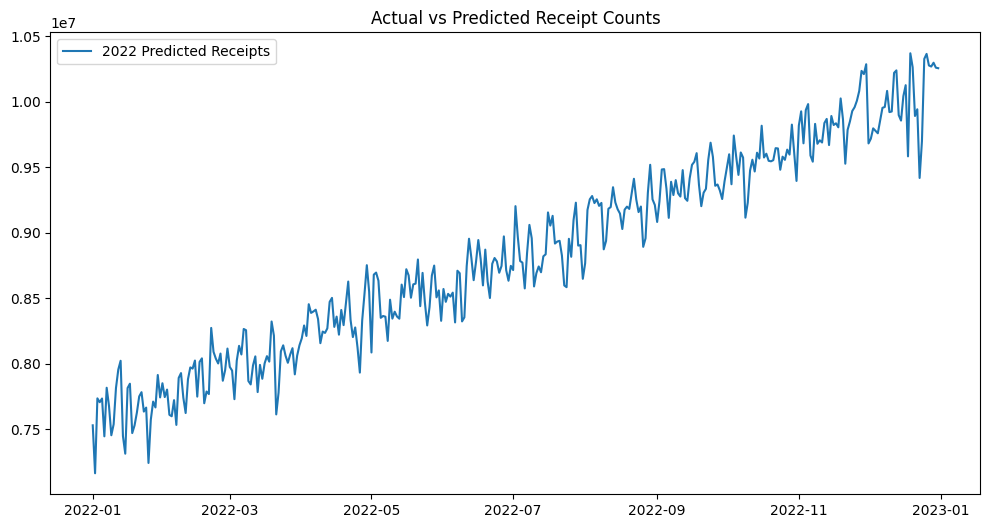

In [18]:
# Create a DataFrame with dates for 2022
date_range_2022 = pd.date_range(start='2022-01-01', end='2022-12-31')
data_2022 = pd.DataFrame(date_range_2022, columns=["Date"])
data_2022 = get_time_feature(data_2022, "Date", keep=True)
# Splitting the 2021 data
X_train_2021 = data_new.drop(['Receipt_Count','Date'], axis=1).reset_index(drop = True)
y_train_2021 = data_new['Receipt_Count']

model = xgb.XGBRegressor(n_estimators=100,objective ='reg:squarederror')
model.fit(X_train_2021, y_train_2021)

# Predicting for 2022
X_test_2022 = data_2022.drop('Date', axis=1) 
X_test_2022['Date_weekofyear'] = X_test_2022['Date_weekofyear'].astype(int)
predictions_2022 = model.predict(X_test_2022)

# Adding predictions to the 2022 dataset
data_2022['Predicted_Receipt_Count'] = predictions_2022

# Plotting
plt.figure(figsize=(12, 6))
#plt.plot(data_new['Date'], data_new['Receipt_Count'], label='2021 Actual Receipts')
plt.plot(data_2022['Date'], data_2022['Predicted_Receipt_Count'], label='2022 Predicted Receipts')
plt.title('Actual vs Predicted Receipt Counts')
plt.legend()
plt.show()



### Observations: 

The predictions for 2022 looks pretty good. But it seems that it is mimicing the exact trend for 2021. Maybe because of the features we added? Like it is adjusting like For this particular month for this particular date it should be this value of target? Maybe adding lag features to xgboost can help. 

## Feature importance:

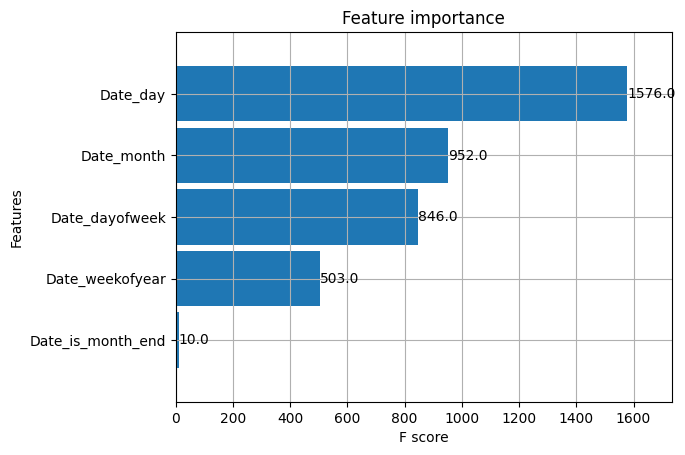

In [19]:
from xgboost import plot_importance, plot_tree

_ = plot_importance(model, height=0.9)

## Xgboost with Lag Features

I am also changing my approach and strategy a little bit to improve the predictions

Validation Strategy & Approach:

Expanding Window Method: The model is trained on an incrementally larger subset of the historical data to predict future values, simulating real-world scenarios where we accumulate more data over time. <br>
Lagged Features: To capture temporal dependencies, the previous values (Receipt_Count_lag1, Receipt_Count_lag2, etc.) of the target variable are used as features to make predictions for the next year. <br>
Iterative Prediction for 2022: Starting from January 2022, each day's receipt count is predicted using the model and then used as lagged values for subsequent predictions, mimicking a recursive forecasting approach.

In [23]:
# Fucntion to create lag features

def create_lag_features(df, lags = [1,2,3]):
    df = df.copy()
    for lag in lags:
        df['Receipt_Count_lag' + str(lag)] = df['Receipt_Count'].shift(lag)
    return df


Index(['Date_is_wknd', 'Date_quarter', 'Date_is_month_start',
       'Date_is_month_end', 'Receipt_Count_lag1', 'Receipt_Count_lag2',
       'Receipt_Count_lag3'],
      dtype='object')


/tmp/ipykernel_32/3008281504.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['Predicted_Receipt_Count'] = predictions


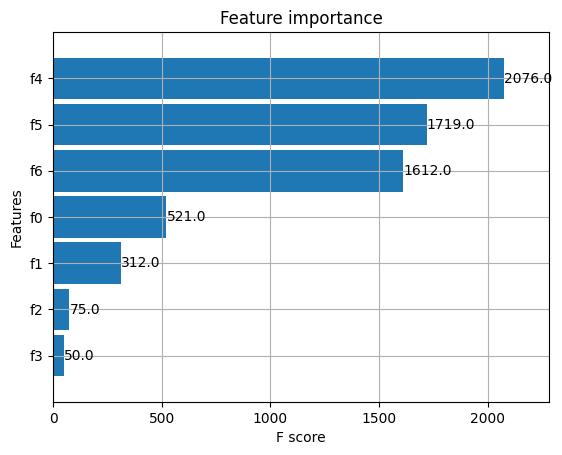

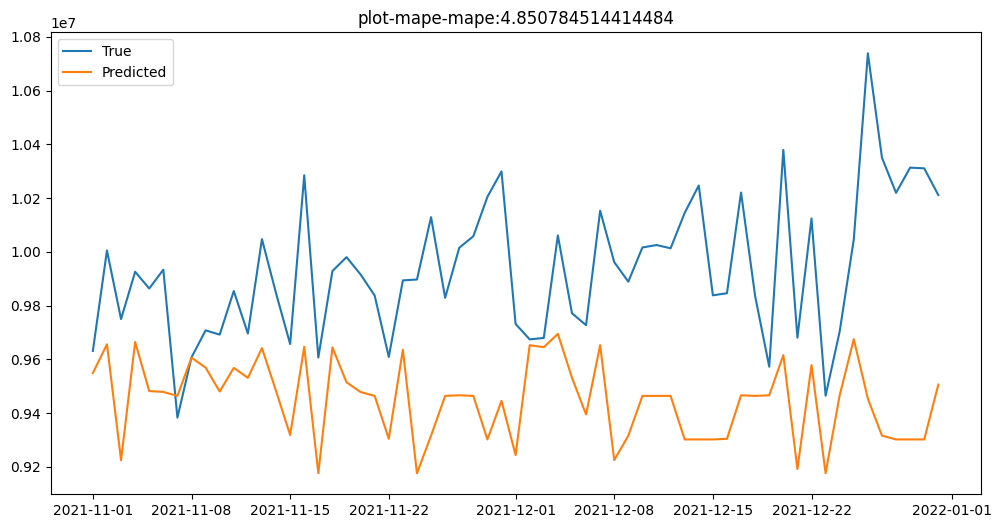

In [24]:
def predict_next_year(df, n_lags=3, months_for_val=2):
    predictions = []
    df = get_time_feature(df,"Date")
    df = df[['Date_is_wknd', 
             'Date_quarter',
             'Date_is_month_start',
             'Date_is_month_end',
             'Receipt_Count',
             'Date']]
    
    df = create_lag_features(df)
    df = df.set_index('Date')
    # Split data into training and validation sets based on months
    split_date = df.index[-1] - pd.DateOffset(months=months_for_val)
    train_df = df.loc[df.index <= split_date]
    valid_df = df.loc[df.index > split_date]
    
    X_train = train_df.drop(['Receipt_Count'], axis=1)
    y_train = train_df['Receipt_Count']
    print(X_train.columns)

    model = xgb.XGBRegressor(n_estimators=250, objective='reg:squarederror')
    model.fit(X_train.values, y_train.values)
    
    _ = plot_importance(model, height=0.9)
    
    for day in range(len(valid_df)):
        # Populate lags for the validation set
        for i in range(1, n_lags+1):
            valid_df.loc[valid_df.index[day], f'Receipt_Count_lag{i}'] = train_df.iloc[-i]['Receipt_Count'] if day-i < 0 else valid_df.iloc[day-i]['Receipt_Count']
        
        X_test = valid_df.drop(['Receipt_Count'], axis=1).iloc[day].values.reshape(1, -1)
        
        pred = model.predict(X_test)[0]
        predictions.append(pred)
    
    valid_df['Predicted_Receipt_Count'] = predictions
    
    return valid_df, model  # Return validation dataframe and model for further use

val_results, trained_model = predict_next_year(data)

metric = mape(val_results['Receipt_Count'].values,val_results['Predicted_Receipt_Count'].values)

plt.figure(figsize=(12, 6))
plt.plot(val_results.index, val_results['Receipt_Count'], label='True')
plt.plot(val_results.index, val_results['Predicted_Receipt_Count'], label='Predicted')
plt.title(f'plot-mape-mape:{metric}')
plt.legend()
plt.show()

We can see with the lag features the validation MAPE decreased to 4.8%. I also removed the months and day kind of features so that model will not predict obvious values for same dates and months.   

Now lets go ahead and train for 2021 and predict for 2022 by populating first 3 lag features for 2022 from 2021. 

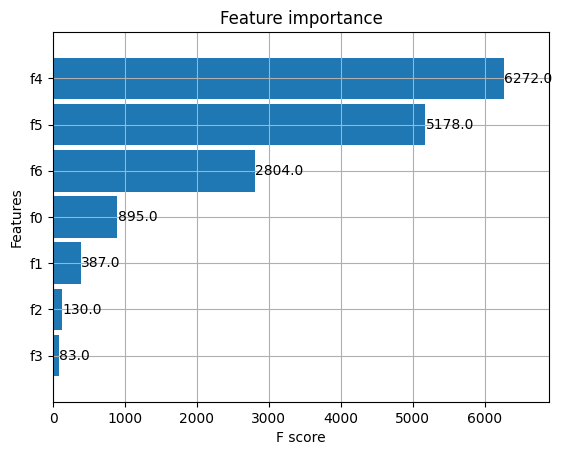

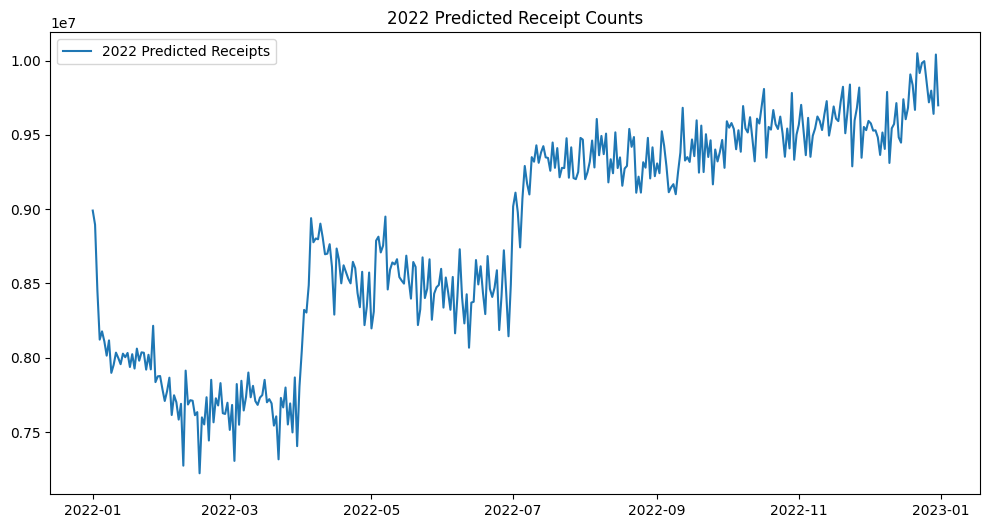

In [25]:
import pickle

# Create a function to predict for the next year iteratively
def predict_next_year(df, n_lags=3):
    predictions = []
    df = get_time_feature(df,"Date")
    df = df[['Date_is_wknd', 
             'Date_quarter',
             'Date_is_month_start',
             'Date_is_month_end',
             'Receipt_Count']]
    df = create_lag_features(df)
    df = df.dropna()
    # Preparing dataset for 2022
    start_date = "2022-01-01"
    end_date = "2022-12-31"
    date_rng = pd.date_range(start=start_date, end=end_date, freq='D')
    df_2022 = pd.DataFrame(date_rng, columns=['Date'])
    df_2022 = get_time_feature(df_2022,"Date")
    df_2022 = df_2022.drop('Date',axis = 1)
    df_2022 = df_2022[['Date_is_wknd', 
                       'Date_quarter',
                       'Date_is_month_start',
                       'Date_is_month_end']]
    
    X_train = df.drop(['Receipt_Count'], axis=1)
    y_train = df['Receipt_Count']
    model = xgb.XGBRegressor(n_estimators = 1000, objective='reg:squarederror')
    model.fit(X_train.values, y_train.values)
    
    # Save the model File
    with open("xgb_model.pkl", "wb") as model_file:
        pickle.dump(model, model_file)
        
        
    _ = plot_importance(model, height=0.9)
    
    
    for day in range(len(df_2022)):
        # Use the last n_lags values from the train set (or previous predictions) as lag features
        for i in range(1, n_lags+1):
            if day-i < 0:
                df_2022.loc[day, f'Receipt_Count_lag{i}'] = df.iloc[-(i-day)]['Receipt_Count']
            else:
                df_2022.loc[day, f'Receipt_Count_lag{i}'] = df_2022.loc[day-i, 'Receipt_Count']
        
        
        # Avoid dropping 'Receipt_Count' for df_2022 since it doesn't exist yet
        if 'Receipt_Count' in df_2022.columns:
            X_test = df_2022.drop('Receipt_Count', axis=1).iloc[day].values.reshape(1, -1)
        else:
            X_test = df_2022.iloc[day].values.reshape(1, -1)
        
        #predict
        pred = model.predict(X_test)[0]
        
        # Save prediction
        predictions.append(pred)
        df_2022.loc[day, 'Receipt_Count'] = pred
        
    df_2022['Receipt_Count'] = predictions
    return df_2022

predicted_2022 = predict_next_year(data)


plt.figure(figsize=(12, 6))
plt.plot(pd.date_range(start='2022-01-01', end='2022-12-31'),predicted_2022['Receipt_Count'], label='2022 Predicted Receipts')
plt.title('2022 Predicted Receipt Counts')
plt.legend()
plt.show()

We can see there are fluctualtions in the Receipt count. And the model is not obviously predicting the upper trend kindoff values. I am going with this model For deployement. 

# Gru Model

### Lets explore GRU model for this task

In [26]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn

# Define Custom Pytorch MAPE loss Function
class MAPELoss(nn.Module):
    def __init__(self):
        super(MAPELoss, self).__init__()

    def forward(self, y_pred, y_true):
        epsilon = 1e-6
        diff = torch.abs((y_true - y_pred) / torch.clamp(torch.abs(y_true), min=epsilon))
        return 100 * torch.mean(diff)


def create_sequences(data, seq_length, columns):
    xs = []
    ys = []
    data = get_time_feature(data,"Date")
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length][columns].values
        y = data.iloc[i+seq_length]['Receipt_Count']
        xs.append(x)
        ys.append(y)
    return torch.tensor(xs, dtype=torch.float32), torch.tensor(ys, dtype=torch.float32)

features = ['Receipt_Count', 'Date_year', 'Date_month', 'Date_day', 'Date_weekofyear', 'Date_dayofweek', 
            'Date_is_wknd', 'Date_quarter', 'Date_is_month_start', 'Date_is_month_end']


split_date = data.set_index('Date').index[-1] - pd.DateOffset(months=3)
train_df = data.set_index('Date').loc[data.set_index('Date').index <= split_date]
valid_df = data.set_index('Date').loc[data.set_index('Date').index > split_date]
seq_length = 3
X_train, y_train = create_sequences(train_df.reset_index(), seq_length, features)
X_val, y_val = create_sequences(valid_df.reset_index(), seq_length, features)

train_data = TensorDataset(X_train, y_train)
val_data = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64)

class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, num_layers=2):
        super(GRUNet, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device) 
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return out


# Training parameters
n_epochs = 50
train_losses = []
val_losses = []

# Checking for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

num_features = len(features)
model = GRUNet(num_features, 64, 1, 2).to(device)
criterion = MAPELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(n_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    for seq, labels in train_loader:
        seq = seq.to(device)
        labels = labels.to(device)
        
        # Reset gradients
        optimizer.zero_grad()
        # Forward pass
        output = model(seq)
        # Calculate loss
        loss = criterion(output, labels)
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * seq.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)
    
    # Validation phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for seq, labels in val_loader:
            seq = seq.to(device)
            labels = labels.to(device)
            
            output = model(seq)
            loss = criterion(output, labels)
            val_loss += loss.item() * seq.size(0)
    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)
    
    # Print statistics for each epoch
    print(f"Epoch {epoch+1}/{n_epochs} - Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

print('Finished Training')


/tmp/ipykernel_32/1850074998.py:26: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  return torch.tensor(xs, dtype=torch.float32), torch.tensor(ys, dtype=torch.float32)


cpu
Epoch 1/50 - Train Loss: 100.0000, Validation Loss: 99.9999
Epoch 2/50 - Train Loss: 99.9999, Validation Loss: 99.9999
Epoch 3/50 - Train Loss: 99.9999, Validation Loss: 99.9999
Epoch 4/50 - Train Loss: 99.9998, Validation Loss: 99.9998
Epoch 5/50 - Train Loss: 99.9998, Validation Loss: 99.9998
Epoch 6/50 - Train Loss: 99.9998, Validation Loss: 99.9998
Epoch 7/50 - Train Loss: 99.9997, Validation Loss: 99.9997
Epoch 8/50 - Train Loss: 99.9997, Validation Loss: 99.9997
Epoch 9/50 - Train Loss: 99.9996, Validation Loss: 99.9997
Epoch 10/50 - Train Loss: 99.9996, Validation Loss: 99.9996
Epoch 11/50 - Train Loss: 99.9996, Validation Loss: 99.9996
Epoch 12/50 - Train Loss: 99.9995, Validation Loss: 99.9996
Epoch 13/50 - Train Loss: 99.9995, Validation Loss: 99.9995
Epoch 14/50 - Train Loss: 99.9995, Validation Loss: 99.9995
Epoch 15/50 - Train Loss: 99.9994, Validation Loss: 99.9995
Epoch 16/50 - Train Loss: 99.9994, Validation Loss: 99.9994
Epoch 17/50 - Train Loss: 99.9993, Validatio

# As a neural network it has many parameters to be adjusted with limited data it is not possible.